In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/fusepyt/stockdata/Value of Video Games Industry.png
/kaggle/input/d/fusepyt/stockdata/Graphics-Card-pricing.png
/kaggle/input/d/fusepyt/stockdata/marketcap.csv
/kaggle/input/d/fusepyt/stockdata/gpuclock.png
/kaggle/input/d/fusepyt/stockdata/btc-diff.png


In [2]:
from IPython import display

# Chips Stock Market Analysis(NVIDIA, AMD, INTEL)

## Part I Market Analysis

Questions\
1.How is demand of GPUs in the future?\
2.What is the trend of Market Capitalization Growth and the percentage change of the stocks over years?\
3.Which stocks have the most Return On Equity in the recent year?

### 1.How is the GPUs Demand in the future?
In the future, digitalization is going to be relevant for daily life wheather it is in entertainment, statistics, or financial.\
The factors can effect to GPUs demands:\
1.1) Video game Industry\
1.2) Machine Learning\
1.3) Crypocurrency Mining\

Note : The data used in this section are retrieved from related article website due to the limited of free data acess.

#### 1.1) Growth of Video Game Industry

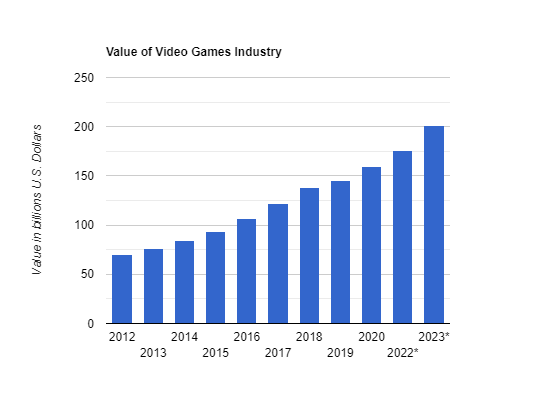

In [3]:
display.Image("/kaggle/input/d/fusepyt/stockdata/Value of Video Games Industry.png")

Bar graph above shows the game industry will continue to grow in next coming year.\
The growth on gaming industry is directly proportional to GPU demand since game will be more realistics such as VR will required higher gpu performance to process.\

**Reference : https://www.wepc.com/news/video-game-statistics/

#### 1.2) Machine Learning Industry

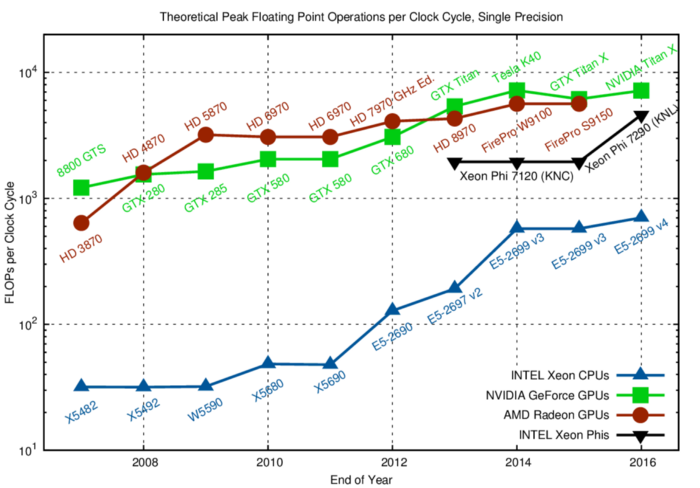

In [4]:
display.Image('/kaggle/input/d/fusepyt/stockdata/gpuclock.png')

Machine Learning will be used more often to make decisions due to its advantages of completing task more efficiently than human.\
In the chart above, you can see that GPUs (red/green) can theoretically do 10–15x the operations of CPUs (in blue). This speedup very much applies in practice too.\
From these reasons will make GPU be more demands in upcoming future.

**Reference : https://towardsdatascience.com/what-is-a-gpu-and-do-you-need-one-in-deep-learning-718b9597aa0d

#### 1.3) Cryptocurrency Mining

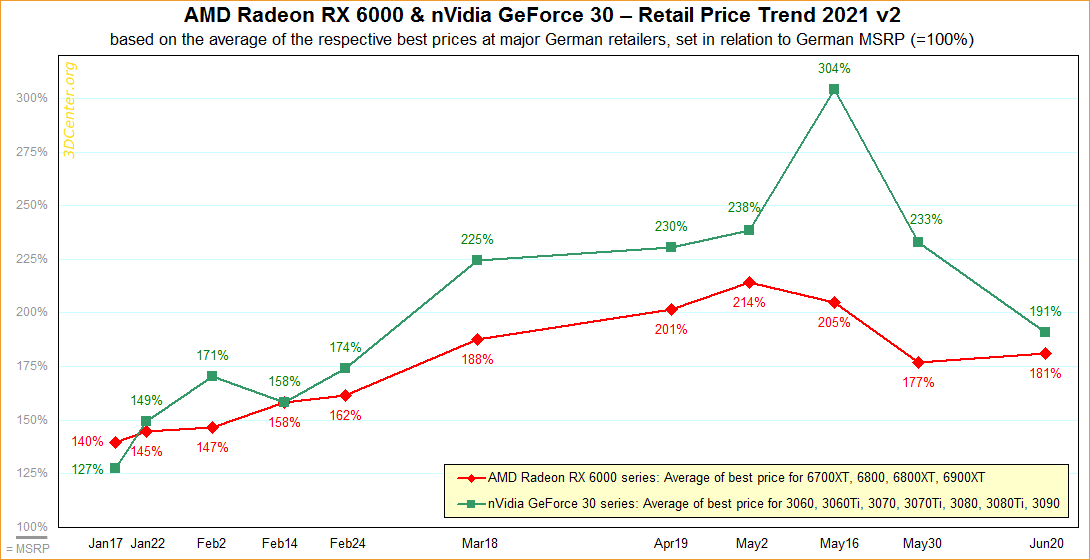

In [5]:
display.Image("/kaggle/input/d/fusepyt/stockdata/Graphics-Card-pricing.png")

From graph above, the price of NVDA GPUs are triple and AMD GPUs are double as their orginal price at the ATH of Bitcoin pirce in 2021

**Reference : https://videocardz.com/newz/graphics-cards-pricing-beginning-to-decline-availability-improving-as-well

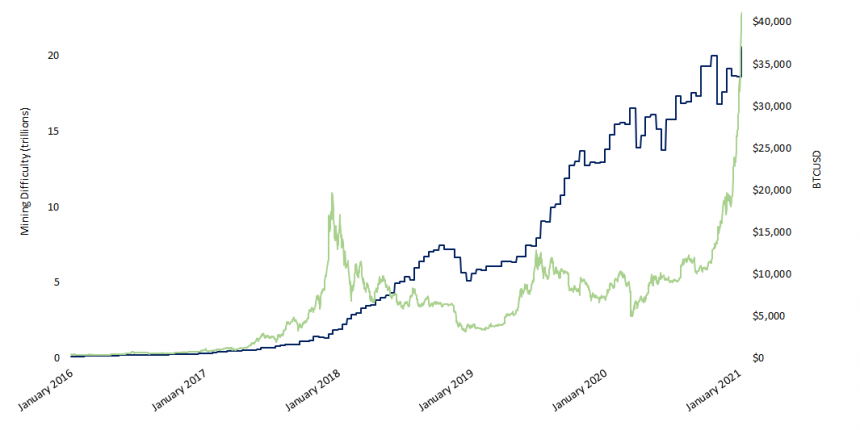

In [6]:
display.Image("/kaggle/input/d/fusepyt/stockdata/btc-diff.png")

Note : Green line = Price\
       Blue  line = Difficulty\
       **Difficulty is a relative measure of the amount of resources required to mine bitcoin that climbs or falls depending on the amount of computing power consumed by the network, known as its hashrate.
       
       From graph above shows that Mining difficulty is increasing when the price is higher. Which mean if the crypocurrency market is continue to grow GPU will be more demand for increasing in dificulty of mining process.
       
**Reference : https://www.nasdaq.com/articles/bitcoin-mining-difficulty-hits-record-high-amid-miner-revenue-surge-2021-01-09

### 2. What is market size and percent change of the stocks over years?

In [7]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=a7846945181a765c7c95659d1d74963e2906060f77415e62e80e410fb07296f9
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8375 sha256=853fb6445c1b0444a1e1e0d583a00888581abd33bde7a0e9fe18fc9ba92d0f2a
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking


In [8]:
#import necessary libralies
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("seaborn-poster")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data as pdr
from pandas_datareader.data import DataReader
import yfinance as yfin
yfin.pdr_override()

# For time stamps
from datetime import datetime

In [9]:
market_cap = pd.read_csv('/kaggle/input/d/fusepyt/stockdata/marketcap.csv')

stock_list = ['AMD','NVDA','INTC']
market_cap = market_cap.fillna(method='ffill')
market_cap.head()

,Date,AMD,NVDA,INTC
0,2/16/2010,5.42B,9.96B,107.55B
1,4/30/2010,6.11B,7.43B,133.76B
2,7/30/2010,5.05B,5.69B,120.77B
3,10/25/2010,4.95B,8.59B,110.67B
4,2/14/2011,5.91B,10.60B,118.98B


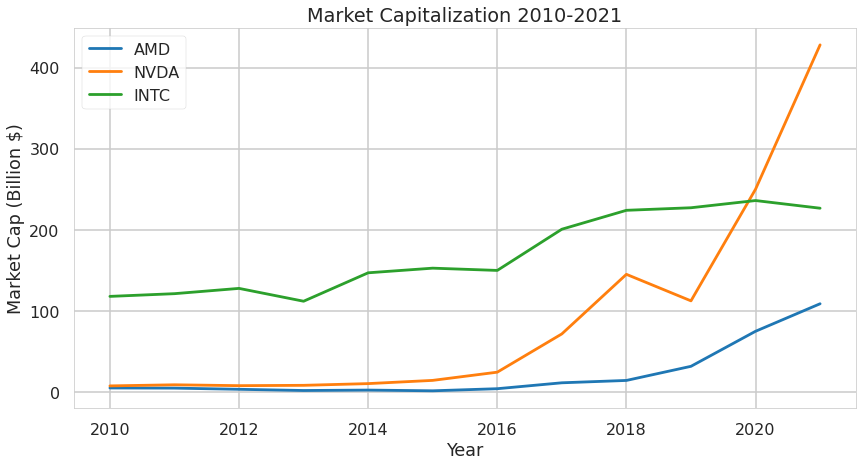

In [10]:
#Clean data and change datatype for calculation
market_cap['Year']=market_cap['Date'].apply(lambda x:x.split('/')[2])
market_cap[stock_list] = market_cap[stock_list].replace({'B':''}, regex=True)
market_cap[stock_list] = market_cap[stock_list].astype(float)

#years = [year for year, df in market_cap.groupby(['Year'])]
cap_yearly = market_cap.groupby(['Year']).mean()
cap_yearly.plot(kind='line',figsize=(14,7),title='Market Capitalization 2010-2021')
plt.ylabel('Market Cap (Billion $)')
plt.xlabel('Year')

plt.show()

From market cap bar chart, NVDA outperform other chips stock in the recent years.\
On the other hand, AMD has the least marketcap and it is continue to grow linearly since 2016\
Intel look very limited to grow since it has large marketcap and lack of innovation.

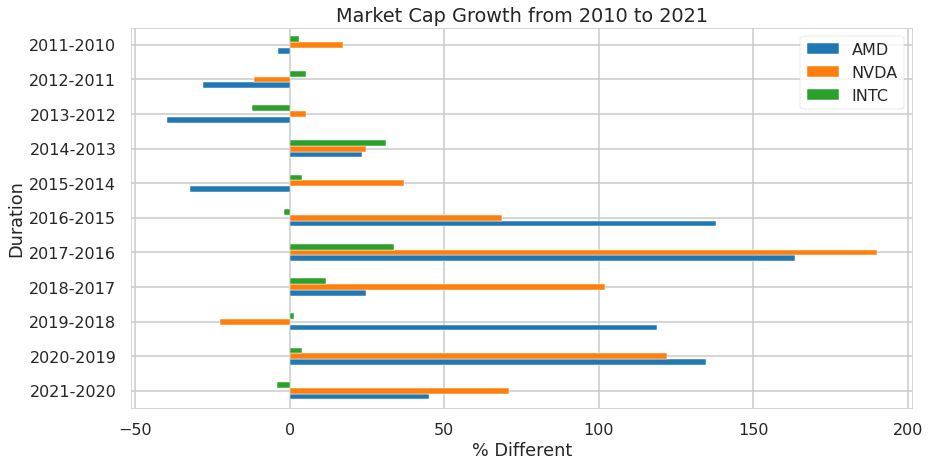

In [11]:
#iteration calculation %change each year and return them to dataframe
data = []
for n in range(-1,-12,-1):
        cap = ((cap_yearly.iloc[n]-cap_yearly.iloc[n-1])/cap_yearly.iloc[n-1])*100
        data.append((cap)) 

cap_percent = pd.DataFrame(data, columns=stock_list)
duration = ['2021-2020','2020-2019','2019-2018','2018-2017','2017-2016','2016-2015','2015-2014','2014-2013','2013-2012','2012-2011','2011-2010']
cap_percent['Duration'] = duration
cap_percent = cap_percent.set_index(['Duration'])
cap_percent.plot(kind='barh',figsize=(14,7),title='Market Cap Growth from 2010 to 2021')
plt.xlabel('% Different')
plt.show()

NVDA and AMD have been grown up greatly in the past decade\
Contrary, INTEL seems to be the slowest growth in term of marketcap.

### 3.Return on Equity

In [12]:
tickers_list = ['NVDA','AMD','INTC']
tickers_data= {}
                
for ticker in tickers_list:
    ticker_object = yfin.Ticker(ticker)

    #convert info() output from dictionary to dataframe
    temp = pd.DataFrame.from_dict(ticker_object.info, orient="index")
    temp.reset_index(inplace=True)
    temp.columns = ["Attribute", "Value"]
    
    # add (ticker, dataframe) to main dictionary
    tickers_data[ticker] = temp

combined_data = pd.concat(tickers_data)
combined_data = combined_data.reset_index()

del combined_data["level_1"] # clean up unnecessary column
combined_data.columns = ["Ticker", "Attribute", "Value"] # update column names

#read all companies information from yahooo
combined_data

,Ticker,Attribute,Value
0,NVDA,zip,95051
1,NVDA,sector,Technology
2,NVDA,fullTimeEmployees,18975
3,NVDA,longBusinessSummary,NVIDIA Corporation operates as a visual comput...
4,NVDA,city,Santa Clara
...,...,...,...
448,INTC,dividendYield,0.0258
449,INTC,bidSize,1400
450,INTC,dayHigh,54.41
451,INTC,regularMarketPrice,53.88


In [13]:
roe = combined_data[combined_data["Attribute"]=="returnOnEquity"].reset_index()
roe = roe.rename(columns={'Ticker':'Stock'})
del roe["index"] # clean up unnecessary column
roe.sort_values('Value',ascending=False)

,Stock,Attribute,Value
1,AMD,returnOnEquity,0.66268
0,NVDA,returnOnEquity,0.40375
2,INTC,returnOnEquity,0.22193


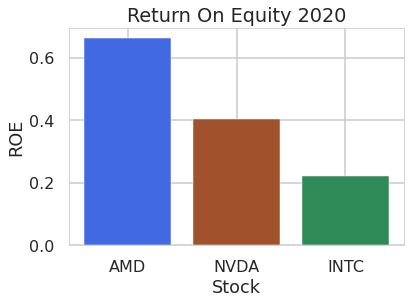

In [14]:
roe = roe.sort_values('Value',ascending=False)
roe_y = roe['Value']
roe_x =roe['Stock']
plt.bar(roe_x,roe_y,color=('royalblue','sienna','seagreen'))
plt.title('Return On Equity 2020')
plt.ylabel('ROE')
plt.xlabel('Stock')
plt.show()

From table above, AMD has highest Return On Equity(ROE) at 66.20%, NVDA has 40.30%, and INTEL has 22.19%

Note : Return on equity (ROE) is a measure of financial performance calculated by dividing net income by shareholders' equity. Because shareholders' equity is equal to a company’s assets minus its debt, ROE is considered the return on net assets. ROE is considered a gauge of a corporation's profitability and how efficient it is in generating profits.

Ref : https://www.investopedia.com/terms/r/returnonequity.asp

#### Part I Conclusion
From benchmarking, AMD and NVDA have better performance than INTEL in term of market capitalization and ROE.\
Since, INTEL is already one of the largest company which has the slowest growth rate comparing to NVDA and AMD.\
Therefore,INTEL will be removed for futher analysis.

### Part II Technical Analysis
    4.Historical Price
    5.Moving Average
    6.Daily return of the stock on average
    7.Correlation
    8.Forcasting

In [15]:
#chips stock we interesting
stock_list = ['NVDA','AMD']
btc = ['BTC-USD']
all_list = ['NVDA','AMD','BTC-USD']

#Set up Ebd and Start times for data grap
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

#For loop for graping yahoo dataset
#for stock in chip_list:
    #globals()[stock] = DataReader(stock,'yahoo',start,end)
df = pdr.get_data_yahoo(stock_list, start, end)
all_df = pdr.get_data_yahoo(all_list, start, end)

#load data into dataframe
all_stock = pd.DataFrame(df)
all_data = pd.DataFrame(all_df)

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed


In [16]:
# fillnan in all_data since BTC update daily
all_data = all_data.fillna(method='bfill')
all_data.head(7)

Adj Close                                Close                \
                  AMD       BTC-USD        NVDA        AMD       BTC-USD   
Date                                                                       
2020-10-11  84.290001  11384.181641  142.111282  84.290001  11384.181641   
2020-10-12  84.290001  11429.506836  142.111282  84.290001  11429.506836   
2020-10-13  85.279999  11429.506836  142.333557  85.279999  11429.506836   
2020-10-14  84.209999  11429.506836  140.805145  84.209999  11429.506836   
2020-10-15  83.129997  11495.349609  139.553955  83.129997  11495.349609   
2020-10-16  83.169998  11322.123047  137.970612  83.169998  11322.123047   
2020-10-17  82.000000  11358.101562  134.836380  82.000000  11358.101562   

                             High                                  Low  \
                  NVDA        AMD       BTC-USD        NVDA        AMD   
Date                                                                     
2020-10-11  142.259995  85.129997  11428.813477  143.470001  83.120003   
2020-10-12  142.259995  85.129997  11539.977539  143.470001  83.120003   
2020-10-13  142.482498  86.089996  11539.977539  143.485001  83.970001   
2020-10-14  140.952499  85.959999  11539.977539  143.427505  83.459999   
2020-10-15  139.699997  84.720001  11569.914062  140.057495  82.419998   
2020-10-16  138.115005  83.989998  11540.061523  141.214996  82.410004   
2020-10-17  134.977493  84.650002  11386.261719  139.835007  81.529999   

                                           Open                            \
                 BTC-USD        NVDA        AMD       BTC-USD        NVDA   
Date                                                                        
2020-10-11  11288.627930  139.125000  83.650002  11296.082031  139.895004   
2020-10-12  11307.831055  139.125000  83.650002  11429.047852  139.895004   
2020-10-13  11307.831055  140.187500  84.860001  11429.047852  142.964996   
2020-10-14  11307.831055  139.600006  85.860001  11429.047852  142.904999   
2020-10-15  11303.603516  137.677505  83.400002  11426.602539  138.107498   
2020-10-16  11223.012695  137.925003  83.540001  11502.828125  140.367493   
2020-10-17  11285.345703  134.067505  83.620003  11322.123047  139.029999   

                Volume                            
                   AMD       BTC-USD        NVDA  
Date                                              
2020-10-11  47669700.0  1.996863e+10  43474400.0  
2020-10-12  47669700.0  2.410343e+10  43474400.0  
2020-10-13  42764100.0  2.410343e+10  34460400.0  
2020-10-14  40403000.0  2.410343e+10  27610000.0  
2020-10-15  33696400.0  2.448723e+10  26722400.0  
2020-10-16  31474300.0  2.563548e+10  24239200.0  
2020-10-17  36689100.0  1.913043e+10  29806800.0

### 4.What is the historical price of stocks?

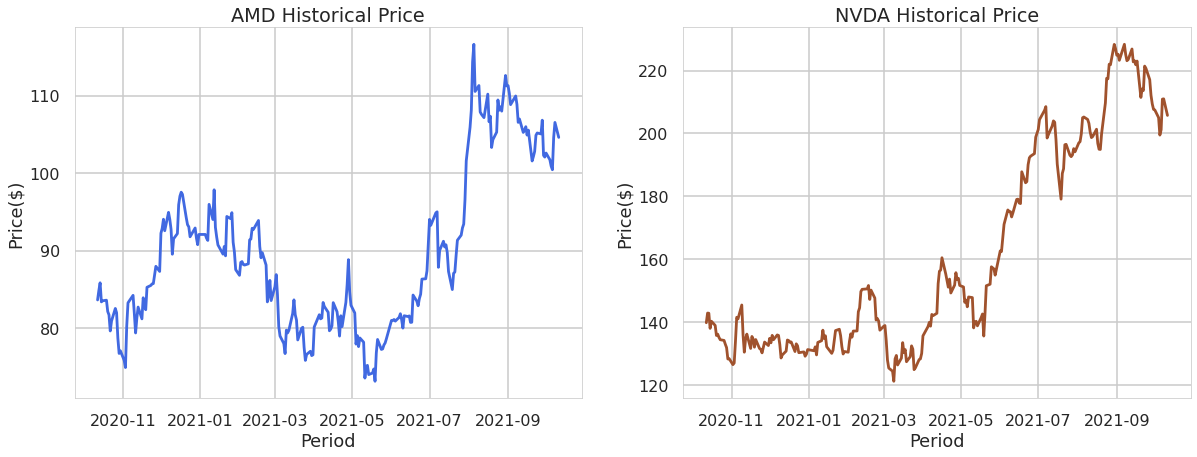

In [17]:
open_df = all_stock['Open']
amd = open_df['AMD']
nvda = open_df['NVDA']

plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.plot(amd.dropna(), color='royalblue')
plt.title('AMD Historical Price')
plt.ylabel('Price($)')
plt.xlabel('Period')

plt.subplot(2, 2, 2)
plt.plot(nvda.dropna(),color='sienna')
plt.title('NVDA Historical Price')
plt.ylabel('Price($)')
plt.xlabel('Period')
plt.show()

### 5. What is moving average?

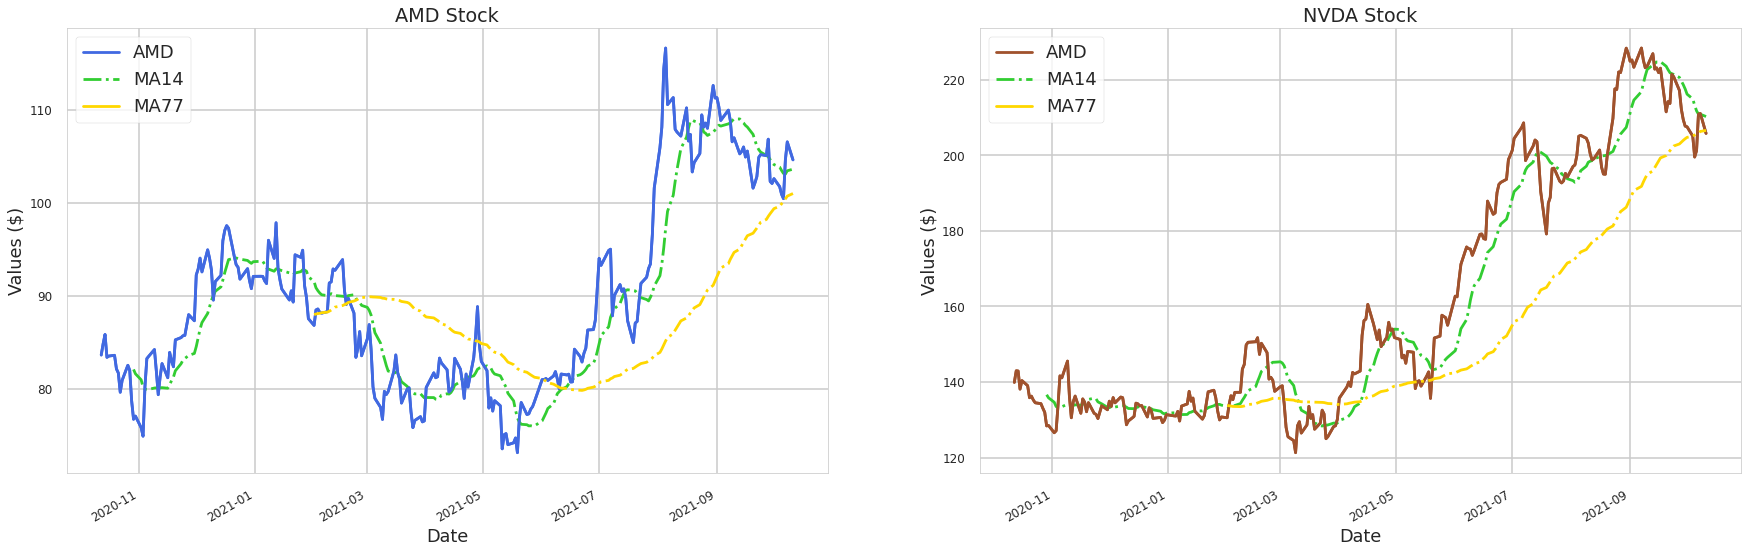

In [18]:
ma_day = [14, 77]
cols = ['limegreen','gold']
leg_name = ['AMD','MA14','MA77']
plt.subplot(2, 2, 1)
for ma,col in zip(ma_day,cols):
    amd.plot(figsize=(30,20),color='royalblue',title='AMD Stock', fontsize=12)
    amd.rolling(ma).mean().plot(color=col,style='-.')
    plt.ylabel('Values ($)') 
    leg = plt.legend(leg_name, fontsize=18)
    colors=['royalblue', 'limegreen','gold']
for i, j in enumerate(leg.legendHandles):
    j.set_color(colors[i])
plt.subplot(2, 2, 2)
for ma,col in zip(ma_day,cols):
    nvda.plot(figsize=(30,20),color='sienna',title='NVDA Stock', fontsize=12)
    nvda.rolling(ma).mean().plot(color=col,style='-.')
    plt.ylabel('Values ($)')
    
    leg = plt.legend(leg_name, fontsize=18)
    colors=['sienna', 'limegreen','gold']
for i, j in enumerate(leg.legendHandles):
    j.set_color(colors[i])
    

Note : In statistics, a moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set. In finance, a moving average (MA) is a stock indicator that is commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.(https://www.investopedia.com/terms/m/movingaverage.asp)

### 6.Daily Return Average

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

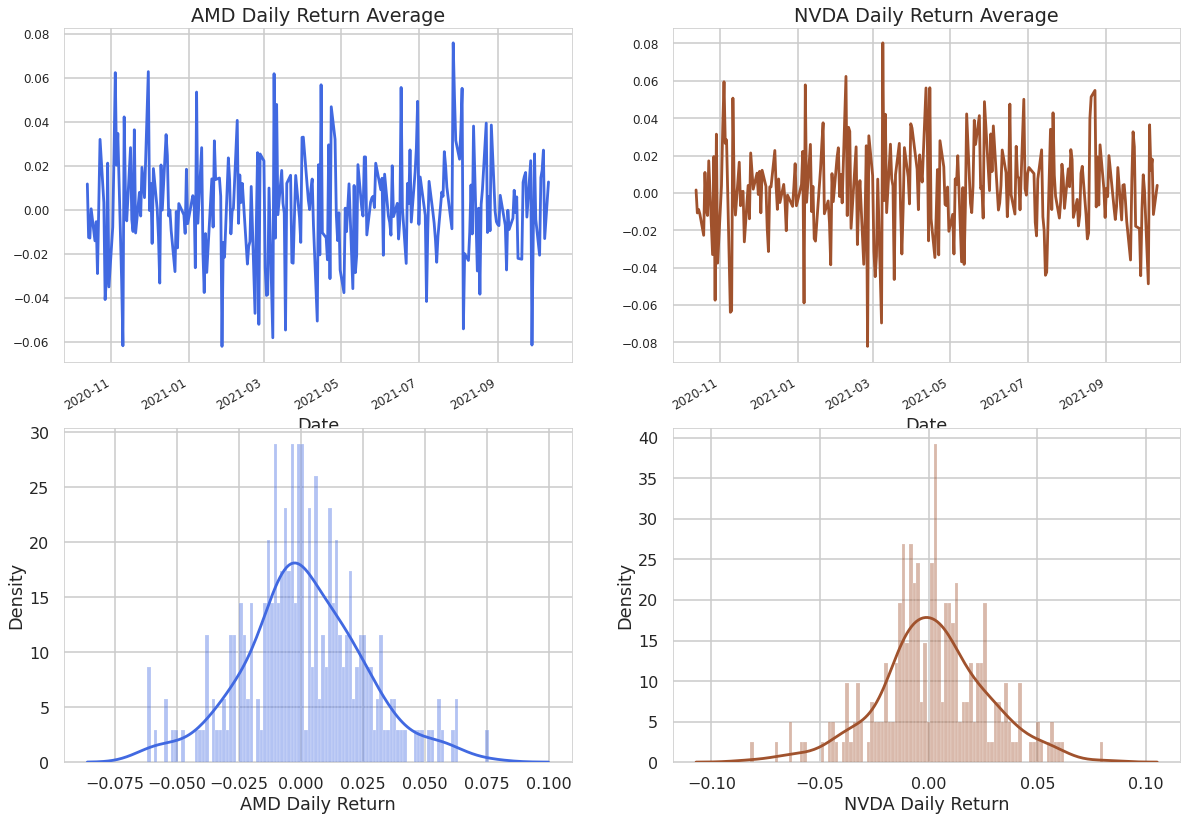

In [19]:
adj_df = all_stock['Adj Close']
adj_df['AMD Daily Return'] = adj_df['AMD'].pct_change()
adj_df['NVDA Daily Return'] = adj_df['NVDA'].pct_change()
amd = adj_df['AMD Daily Return']
nvda = adj_df['NVDA Daily Return']
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
amd.plot(title='AMD Daily Return Average',color='royalblue',fontsize=12)
plt.ylabel=('%Return')
plt.subplot(2, 2, 2)
nvda.plot(title='NVDA Daily Return Average',color='sienna',fontsize=12)
plt.ylabel=('%Return')
plt.subplot(2, 2, 3)
sns.distplot(amd.dropna(), bins=100, color='royalblue')
plt.subplot(2, 2, 4)
sns.distplot(nvda.dropna(), bins=100, color='sienna')
plt.show()

From distribution plot daily return of stock, AMD and NVDA have similar return percentage around -5% to 5%.\
However, AMD is slightly more volatile since it has smaller market capitalization.

### 7. Correlation between chips stock and bitcoin

In [20]:
close_data = all_data['Close']
close_data['AMD %Change'] = close_data['AMD'].pct_change()
close_data['NVDA %Change'] = close_data['NVDA'].pct_change()
close_data['BTC %Change'] = close_data['BTC-USD'].pct_change()
new = close_data[['AMD %Change', 'NVDA %Change', 'BTC %Change']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

<Figure size 1440x1080 with 0 Axes>

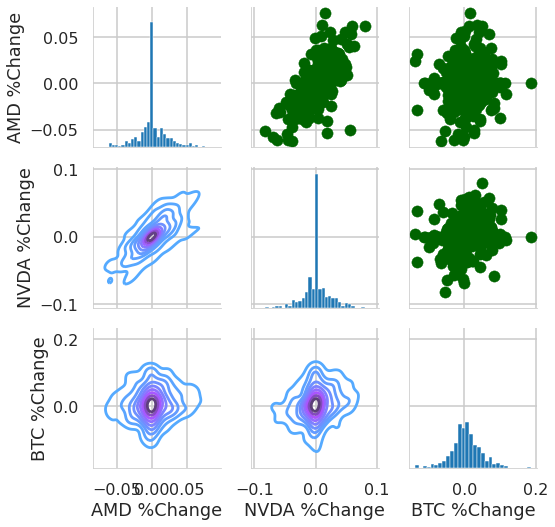

In [21]:
plt.figure(figsize=(20, 15))
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(new.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='darkgreen')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)
plt.show()

<AxesSubplot:>

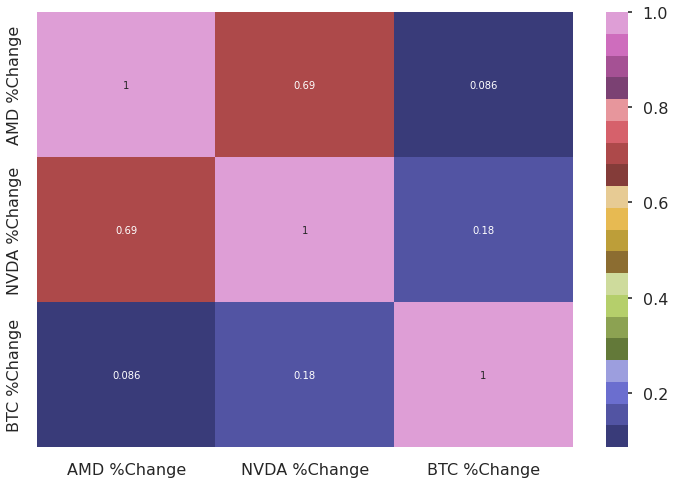

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(new.corr(), annot=True, cmap='tab20b')

As you can see from correlation matrix, NVDA has strong positive correlation to AMD.\
BTC has weak correlation to AMD and NVDA which are 0.086 and 0.18, repectively

#### Part II Conclusion

From the historical figure, you can see that NVDA has similar pattern as AMD which can be proved that they have strong correlation in correlation matrix.\
In moving average figure, the price of stock is above moving average(MA77) means that is a support price for trending stock.

## Part III Forcasting

### 8. How is stock price behavior prediction?

[*********************100%***********************]  1 of 1 completed


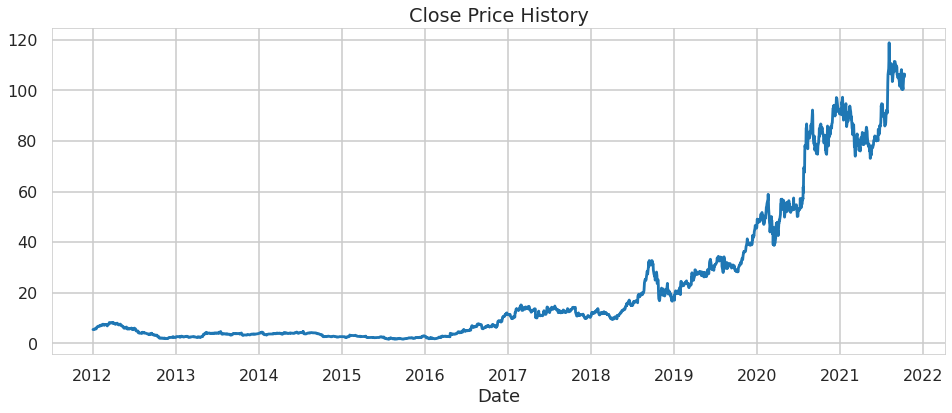

In [23]:
# Get AMD dataset
df = pdr.get_data_yahoo(['AMD'], '2012-01-01', end)
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
#plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [24]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2337

In [25]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03294921],
       [0.03277849],
       [0.03277849],
       ...,
       [0.89483568],
       [0.88297056],
       [0.89410244]])

In [26]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03294921, 0.03277849, 0.03277849, 0.03252241, 0.03388818,
       0.03491251, 0.03576611, 0.03585147, 0.0344857 , 0.03508323,
       0.03713188, 0.0392659 , 0.04097311, 0.04182672, 0.04191208,
       0.04361929, 0.04396074, 0.04438754, 0.04370465, 0.04344857,
       0.04507042, 0.0453265 , 0.04660691, 0.04524115, 0.04703372,
       0.04805805, 0.04797268, 0.04635084, 0.04839949, 0.04865557,
       0.04848485, 0.05096031, 0.04950918, 0.04831413, 0.04711908,
       0.04839949, 0.04985062, 0.04993598, 0.05036278, 0.04891165,
       0.05027743, 0.04985062, 0.04652156, 0.04507042, 0.04737516,
       0.04993598, 0.05087495, 0.05019206, 0.05241144, 0.05241144,
       0.05659411, 0.05616731, 0.05599659, 0.05497226, 0.05480154,
       0.05471618, 0.05522834, 0.05650875, 0.05608194, 0.05514298])]
[0.05548442225619121]

[array([0.03294921, 0.03277849, 0.03277849, 0.03252241, 0.03388818,
       0.03491251, 0.03576611, 0.03585147, 0.0344857 , 0.03508323,
       0.03713188, 0.0392659 , 0.04

In [27]:
pip install --upgrade tensorflow

     |████████████████████████████████| 458.3 MB 7.0 kB/s 
     |████████████████████████████████| 3.9 MB 23.4 MB/s 
     |████████████████████████████████| 4.0 MB 59.0 MB/s 
     |████████████████████████████████| 1.3 MB 54.3 MB/s 
     |████████████████████████████████| 462 kB 27.8 MB/s 
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30692 sha256=a1aa1bc6e65057bc943436150deb11d72ad5cb8641f31d4f9d5618ee02e931a7
  Stored in directory: /root/.cache/pip/wheels/98/91/04/971b4c587cf47ae952b108949b46926f426c02832d120a082a
Successfully built clang
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.32.0
    Uninstalling grpcio-1.32.0:
      Successfully uninstalled grpcio-1.32.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: h5py
    Found existing installation: h5py 2

In [28]:
#install tensorflow and keras package libraly
#conda install numpy=1.19 (downgrown numpy)
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2021-10-11 16:17:33.738722: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-11 16:17:33.738847: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-10-11 16:17:35.654057: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-11 16:17:35.654111: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-11 16:17:35.654137: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fba0f3daec51): /proc/driver/nvidia/version does not exis

2277/2277 [==============================] - 69s 29ms/step - loss: 0.0011


In [29]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.6670029460816256

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


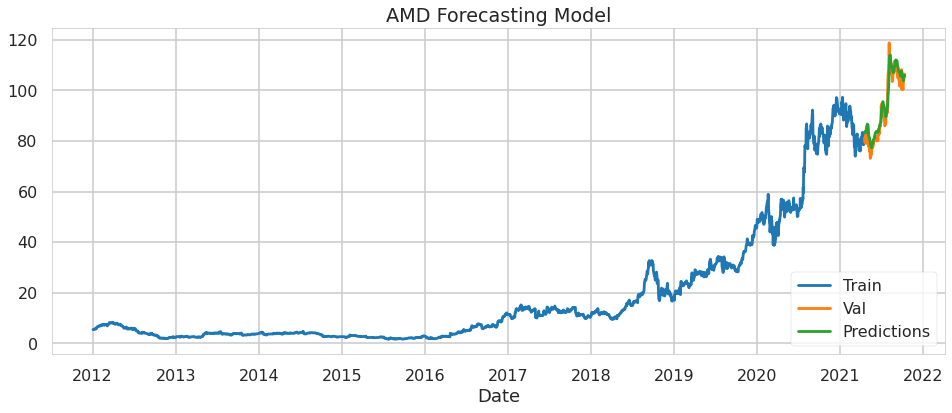

In [30]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('AMD Forecasting Model')
plt.xlabel('Date', fontsize=18)
#plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()